In [1]:
from LTSpice_Simulator import get_Spice_Arrays
import Wavefront_Generation as MC
import Wavefront_Plotting as WP
import matplotlib.pyplot as plt
%matplotlib widget

In [2]:
input_values ={
    'L_time':'3.05',
    'C_time':'3',
    'L_impedance':'1000',
    'number_periods':'1'
}

interface = MC.Full_Cycle(**input_values)

LTSpice_outputs = get_Spice_Arrays(**interface.data_input.SPICE_input_values,Step_size=str(interface.data_input.GCD/8))


Information about this network : 


- The Inductor -
Inductor Inductance Per Length :        1525.000
Inductor Capacitance Per Length :       0.001525
Inductor Length :                       1
Inductor Total Inductance :             1525.000
Inductor Total Capacitance :            0.001525
Inductor Velocity :                     0.6557377049180327868852459016
Inductor One Way Time Delay :           1.525
Inductor Impedance :                    1000

- The Capacitor -
Capacitor Inductance Per Length :       1.5
Capacitor Capacitance Per Length :      1.5
Capacitor Length :                      1
Capacitor Total Inductance :            1.5
Capacitor Total Capacitance :           1.5
Capacitor Velocity :                    0.6666666666666666666666666667
Capacitor One Way Time Delay :          1.5
Capacitor Impedance :                   1

- The Time -
Number Periods :                        1
Simulation Stop Time :                  300.5110318606947885703080828
Number of Wavefronts :    

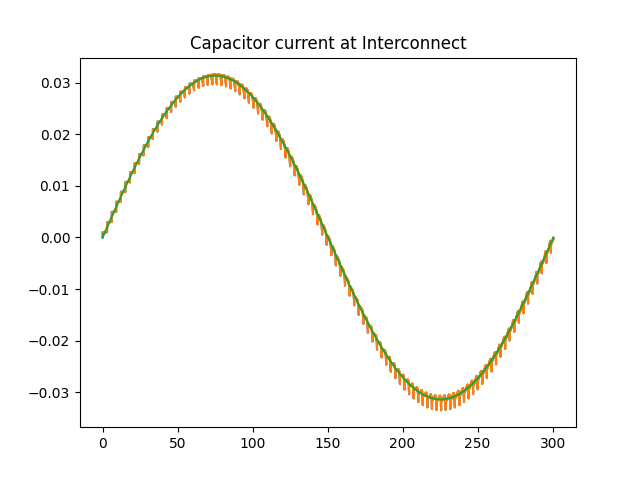

In [3]:
fig,ax = plt.subplots()

ax.plot(LTSpice_outputs['time'],LTSpice_outputs['Capacitor_Current_Tx'])
WP.plot_time_interconnect(interface.data_output_ordered,ax,'Current Capacitor',True)
ax.plot(LTSpice_outputs['time'],LTSpice_outputs['Capacitor_Current_Circuit'])

GridspecLayout(children=(Button(description='step backward', layout=Layout(grid_area='widget001', width='auto'…

FloatSlider(value=0.0, layout=Layout(width='auto'), max=299.5110318606948)

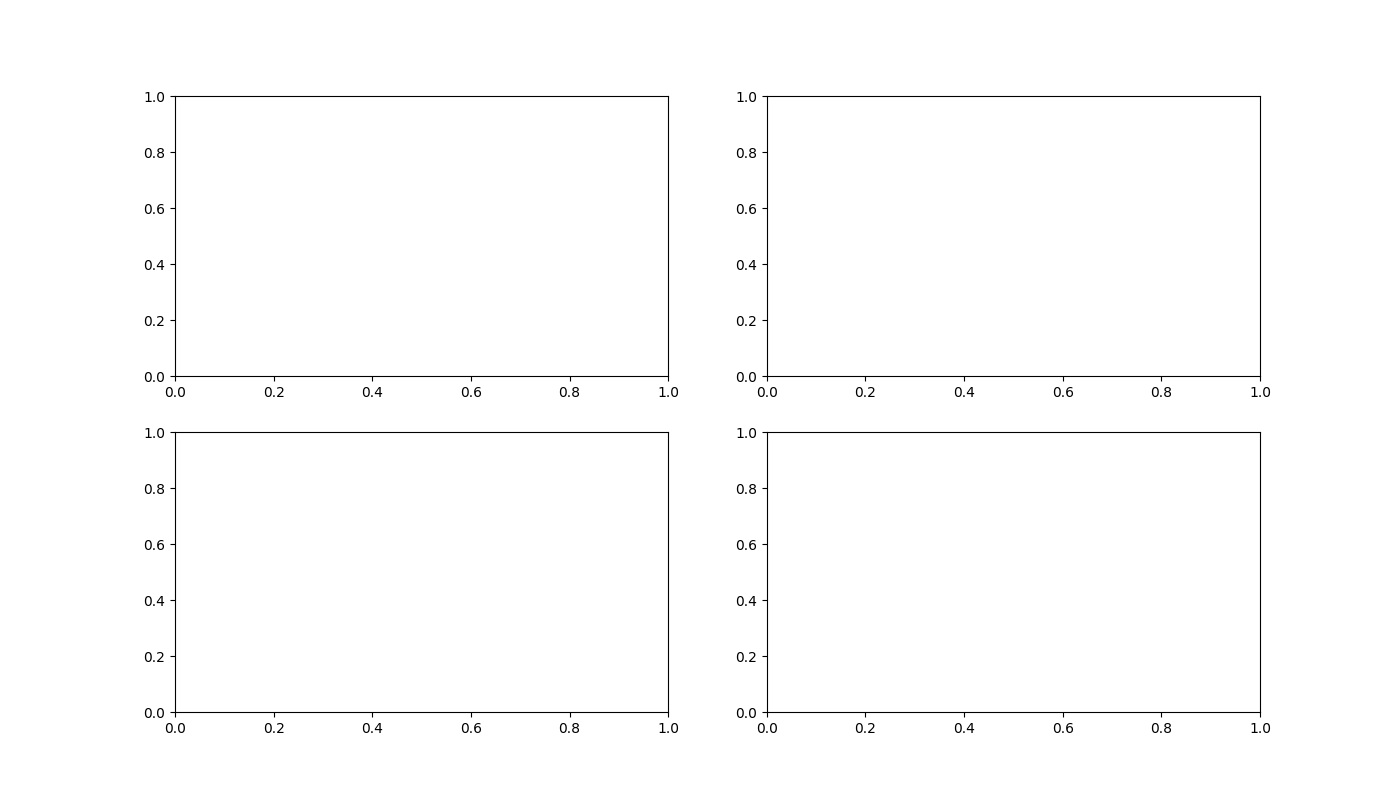

In [4]:
WP.spatial_interconnect_investigator_ui(interface)

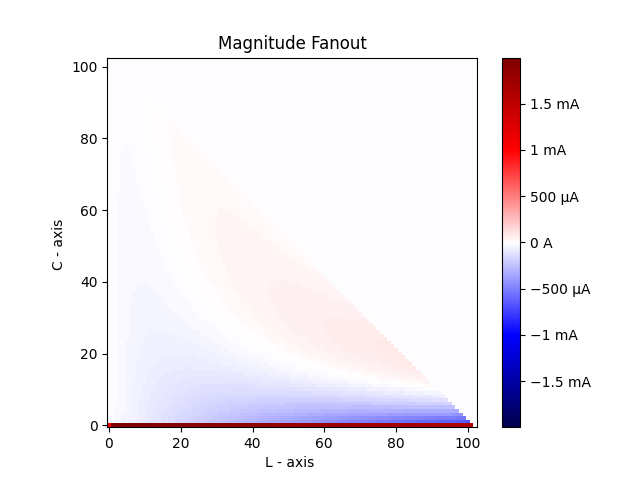

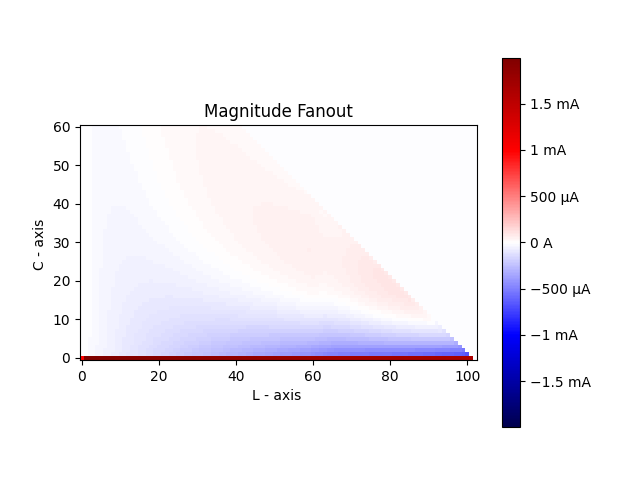

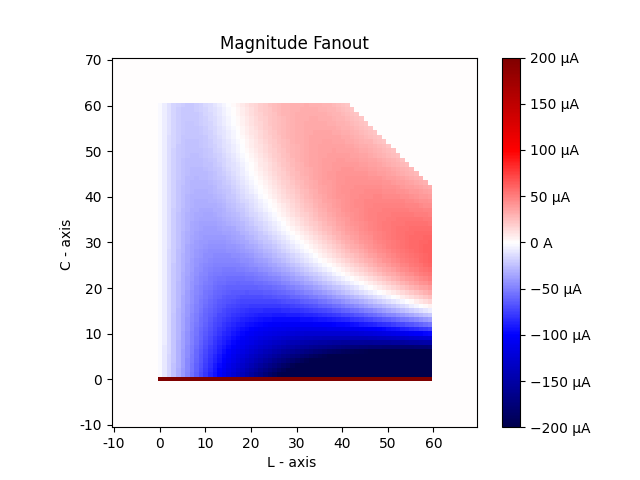

In [5]:
fig_fanout_commutative,ax_fanout_commutative = plt.subplots()
WP.plot_fanout_magnitude(interface.data_output_commutative.Current_Interconnect_Capacitor,ax_fanout_commutative)

fig_fanout_multiplicative,ax_fanout_multiplicative = plt.subplots()
WP.plot_fanout_magnitude(interface.data_output_multiplicative.Current_Interconnect_Capacitor,ax_fanout_multiplicative)

fig_fanout_multiplicative_alt,ax_fanout_multiplicative_alt = plt.subplots()
C_axis_merged = MC.transform_merged_array_to_C_axis(interface.data_input,interface.data_output_multiplicative.Current_Interconnect_Capacitor)
WP.plot_fanout_magnitude(C_axis_merged,ax_fanout_multiplicative_alt,padding=10,custom_colour_bar_limits = (0.0002,-0.0002))

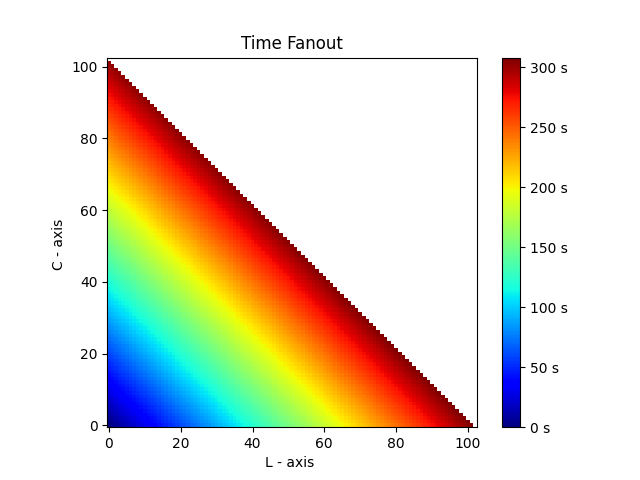

In [6]:
fig_time, ax_time = plt.subplots()
time = interface.data_output_commutative.Time
WP.plot_fanout_time(interface.data_output_commutative.Time,ax_time)